# Airbnb and Zillow dataset 

In [139]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from folium.plugins import HeatMap
import folium
import warnings

In [140]:
warnings.filterwarnings('ignore')

Cleaning and descriptive analysis of the data initially. 

In [141]:
airbnb=pd.read_csv(r'C:\Users\TEST\OneDrive\Desktop\Job applications\Internships\Data Challenge\listings.csv')
airbnb.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20190708031610,2019-07-09,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,f,moderate,f,f,6,0,5,1,0.21
1,2595,https://www.airbnb.com/rooms/2595,20190708031610,2019-07-09,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,1,0,1,0.38
2,3647,https://www.airbnb.com/rooms/3647,20190708031610,2019-07-08,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
3,3831,https://www.airbnb.com/rooms/3831,20190708031610,2019-07-09,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,moderate,f,f,1,1,0,0,4.64
4,5022,https://www.airbnb.com/rooms/5022,20190708031610,2019-07-08,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.10


In [142]:
pd.set_option('display.max_rows', None)

In [143]:
#checking amount of rows in given dataset to understand the size we are working with
len(airbnb)

48895

In [144]:
dfairbnbcopy = airbnb.copy()

In [145]:
#checking type of every column in the dataset
airbnb.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                     

In [146]:
dfairbnbcopy['price'].apply(type)

0        <class 'str'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
5        <class 'str'>
6        <class 'str'>
7        <class 'str'>
8        <class 'str'>
9        <class 'str'>
10       <class 'str'>
11       <class 'str'>
12       <class 'str'>
13       <class 'str'>
14       <class 'str'>
15       <class 'str'>
16       <class 'str'>
17       <class 'str'>
18       <class 'str'>
19       <class 'str'>
20       <class 'str'>
21       <class 'str'>
22       <class 'str'>
23       <class 'str'>
24       <class 'str'>
25       <class 'str'>
26       <class 'str'>
27       <class 'str'>
28       <class 'str'>
29       <class 'str'>
30       <class 'str'>
31       <class 'str'>
32       <class 'str'>
33       <class 'str'>
34       <class 'str'>
35       <class 'str'>
36       <class 'str'>
37       <class 'str'>
38       <class 'str'>
39       <class 'str'>
40       <class 'str'>
41       <class 'str'>
42       <class 'str'>
43       <c

In [147]:
dfairbnbcopy['price'] = dfairbnbcopy['price'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)

In [148]:
dfairbnbcopy['price'].dtypes

dtype('float64')

In [149]:
dfairbnbcopy['price'].head()

0    149.0
1    225.0
2    150.0
3     89.0
4     80.0
Name: price, dtype: float64

In [150]:
airbnb.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               16
summary                                          2041
space                                           14026
description                                       781
experiences_offered                                 0
neighborhood_overview                           17506
notes                                           28704
transit                                         17078
access                                          21701
interaction                                     20064
house_rules                                     18876
thumbnail_url                                   48895
medium_url                                      48895
picture_url                                         0
xl_picture_url              

In [151]:
#replacing all NaN values in 'reviews_per_month' with 0
dfairbnbcopy.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
dfairbnbcopy.reviews_per_month.isnull().sum()

0

In [152]:
#examining the unique values of n_group as this column will appear very handy for later analysis
dfairbnbcopy.neighbourhood_group_cleansed.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [153]:
#examining the unique values of neighbourhood as this column will appear very handy for later analysis
len(dfairbnbcopy.neighbourhood_cleansed.unique())

221

In [154]:
#examining the unique values of room_type as this column will appear very handy for later analysis
dfairbnbcopy.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [155]:
len(dfairbnbcopy.zipcode.unique())

377

In [156]:
#selecting rows only of 2 bedrooms
dfairbnb2bed = dfairbnbcopy.loc[dfairbnbcopy['bedrooms'] == 2]
dfairbnb2bed.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
19,7750,https://www.airbnb.com/rooms/7750,20190708031610,2019-07-08,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,Large Furnished 2BR one block to Central Park...,none,NaN,...,f,f,flexible,f,f,2,1,1,0,0.00
48,13050,https://www.airbnb.com/rooms/13050,20190708031610,2019-07-09,bright and stylish duplex,"Wonderfully bright, comfortable, and stylish, ...","Two large, bright bedrooms and a large bathroo...","Wonderfully bright, comfortable, and stylish, ...",none,The Putnam-Throop area of Bed-Stuy is a vibran...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.10
52,14290,https://www.airbnb.com/rooms/14290,20190708031610,2019-07-08,* ORIGINAL BROOKLYN LOFT *,"Original factory building loft, lots of natur...",BROOKLYN FACTORY LOFT MORGAN AVE L train (5 mi...,"Original factory building loft, lots of natur...",none,"Bushwick is a constantly changing area, new o...",...,t,f,moderate,f,f,1,1,0,0,0.70
61,15396,https://www.airbnb.com/rooms/15396,20190708031610,2019-07-08,Sunny & Spacious Chelsea Apartment,"Modern, spacious, bright and well designed apa...",NaN,"Modern, spacious, bright and well designed apa...",none,Explore Chelsea's thriving new gallery distric...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.12
62,15711,https://www.airbnb.com/rooms/15711,20190708031610,2019-07-08,2 bedroom - Upper East Side-great for kids,This apartment is perfect for families. A Que...,Enjoy an excellent and much more reasonably pr...,This apartment is perfect for families. A Que...,none,Wonderful and safe upper east side. There is a...,...,t,f,strict_14_with_grace_period,f,f,2,2,0,0,0.57


In [157]:
#dfairbnb2bed.zipcode.unique()

In [158]:
len(dfairbnb2bed.zipcode.unique())

315

In [159]:
#Bifurcating the data as per neighbourhood groups so as to understand the distribution of zipcodes in various areas.
df2bedBronx = dfairbnb2bed.loc[dfairbnb2bed['neighbourhood_group_cleansed'] == "Bronx"]

df2bedBrooklyn = dfairbnb2bed.loc[dfairbnb2bed['neighbourhood_group_cleansed'] == "Brooklyn"]

df2bedManhattan = dfairbnb2bed.loc[dfairbnb2bed['neighbourhood_group_cleansed'] == "Manhattan"]

df2bedQueens = dfairbnb2bed.loc[dfairbnb2bed['neighbourhood_group_cleansed'] == "Queens"]

df2bedStatenIsland = dfairbnb2bed.loc[dfairbnb2bed['neighbourhood_group_cleansed'] == "Staten Island"]

df2bedBronx_count= df2bedBronx.shape
df2bedBrooklyn_count = df2bedBrooklyn.shape
df2bedManhattan_count = df2bedManhattan.shape
df2bedQueens_count = df2bedQueens.shape
df2bedStatenIsland_count = df2bedStatenIsland.shape

print("The shape of Bronx 2 bed apts data is: " + str(df2bedBronx_count))
print("The shape of Brooklyn 2 bed apts data is: " + str(df2bedBrooklyn_count))
print("The shape of Manhattan 2 bed apts data is: " +str( df2bedManhattan_count))
print("The shape of Queens 2 bed apts data is: " + str(df2bedQueens_count))
print("The shape of StatenIsland 2 bed apts data is: " + str(df2bedStatenIsland_count))

The shape of Bronx 2 bed apts data is: (94, 106)
The shape of Brooklyn 2 bed apts data is: (2915, 106)
The shape of Manhattan 2 bed apts data is: (2870, 106)
The shape of Queens 2 bed apts data is: (562, 106)
The shape of StatenIsland 2 bed apts data is: (56, 106)


In [160]:
#df2bedQueens.zipcode.unique()

A sample map and scatter plot for prices vs the regions

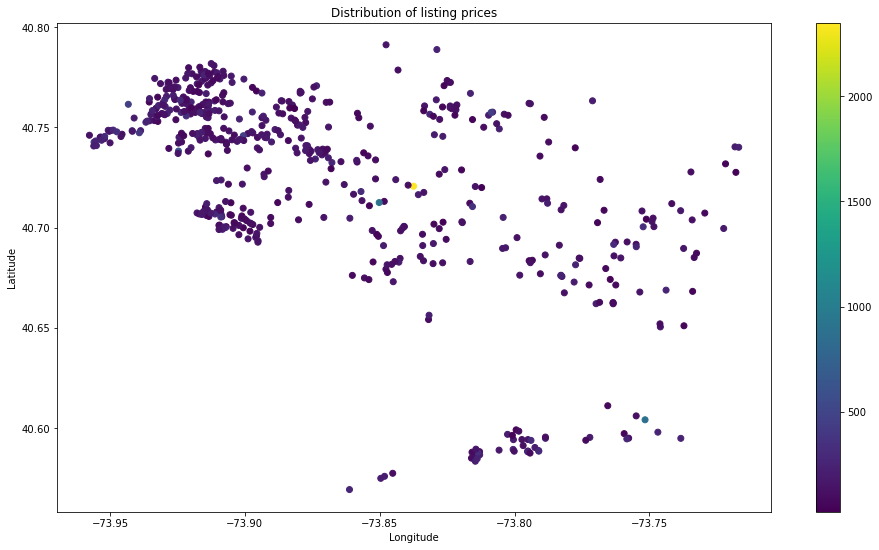

In [161]:
y = df2bedQueens.latitude
x = df2bedQueens.longitude
p = df2bedQueens.price
plt.figure(figsize=(16,9))
plt.scatter(x,y,c=p,cmap='viridis')
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribution of listing prices")
plt.show()

In [162]:
# Visual heatmap of activity

n = folium.Map([40.00, -74], zoom_start=10)

In [163]:
max_amount = float(df2bedQueens.price.max())
print(max_amount)
hmap = folium.Map(location=[40.75, -74], zoom_start=10)

hm_wide = HeatMap( list(zip(df2bedQueens.latitude.values, df2bedQueens.longitude.values, df2bedQueens.price.values)),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

hmap.add_child(hm_wide)

2350.0


The heatmap defines the areas on the basis of price. The darker sides show the higher price rate areas. 

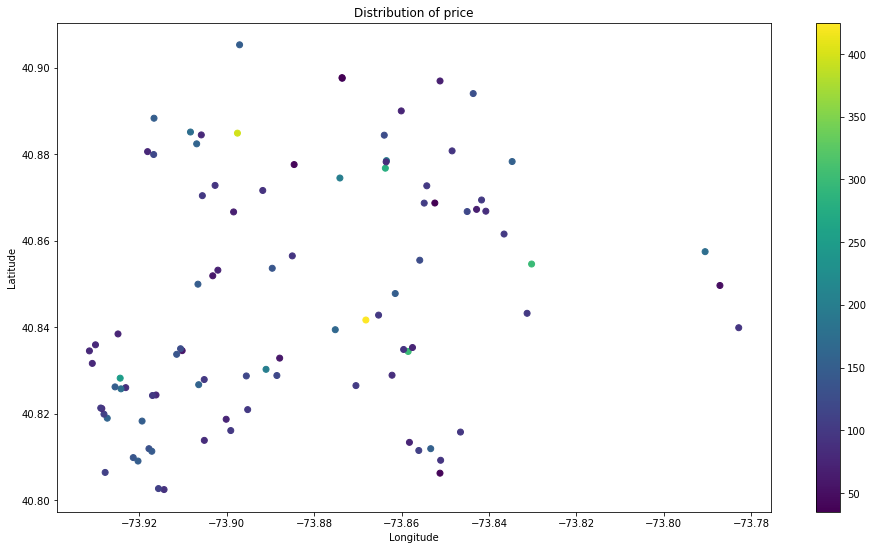

In [245]:
y = df2bedBronx.latitude
x = df2bedBronx.longitude
p = df2bedBronx.price
plt.figure(figsize=(16,9))
plt.scatter(x,y,c=p,cmap='viridis')
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribution of price")
plt.show()

In [165]:
#zillowcopy_ny = zillowcopy[['RegionName', 'City'='New York', 'State'= 'NY', 'Metro'='New York', ]]
import functools
condList = [cond1, cond2]
allcond = functools.reduce(lambda x,y: x & y, condList)
#sales_data[allcond]

#zillowcopy_ny = zillowcopy.City.str.contains('New York')
#zillowcopy_ny = zillowcopy.State.str.contains('NY')
zillowcopy_ny1 = zillowcopy[allcond]

In [166]:
#let's find out more about our neighborhoods presented 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'

#Brooklyn
sub_1=dfairbnb2bed.loc[dfairbnb2bed['neighbourhood_group_cleansed'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=dfairbnb2bed.loc[dfairbnb2bed['neighbourhood_group_cleansed'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=dfairbnb2bed.loc[dfairbnb2bed['neighbourhood_group_cleansed'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=dfairbnb2bed.loc[dfairbnb2bed['neighbourhood_group_cleansed'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=dfairbnb2bed.loc[dfairbnb2bed['neighbourhood_group_cleansed'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [167]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,10.0,25.0,48.00,35.0
25%,120.0,175.0,100.0,81.75,80.0
50%,159.0,250.0,130.0,99.50,100.0
75%,200.0,350.0,180.0,131.25,149.5
max,5000.0,9999.0,2350.0,300.00,425.0


As per the statistical table we have some extreme values, therefore we need to remove them for the sake of a better visualization

Text(0.5, 1.0, 'Density and distribution of prices for each neighborhood_group_cleansed')

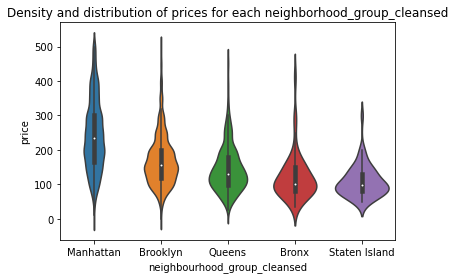

In [168]:
#creating a sub-dataframe with no extreme values / less than 500
sub_6 = dfairbnb2bed[dfairbnb2bed["price"] < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group_cleansed', y='price')
viz_2.set_title('Density and distribution of prices for each neighborhood_group_cleansed')


In [169]:
dfairbnbcopy["latitude"].min()

40.499790000000004

No handles with labels found to put in legend.


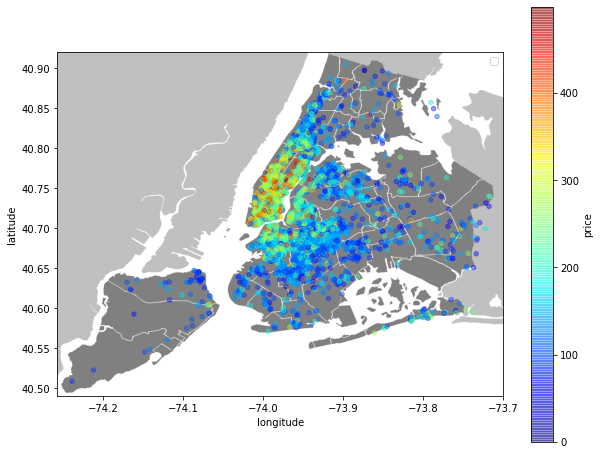

In [246]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
sub_6.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

In [171]:
dfairbnbcopy["longitude"].min()

-74.24441999999999

# Using the reviews to understand zipcodes of good rating and potential worthwhile investment areas

In [172]:
df_zip = dfairbnb2bed[['zipcode', 'number_of_reviews', 'review_scores_rating', 'price']]
df_zip.head()

,zipcode,number_of_reviews,review_scores_rating,price
19,10029,0,NaN,190.0
48,11221,11,94.0,115.0
52,11206,82,94.0,228.0
61,10001,5,100.0,375.0
62,10162,66,93.0,250.0


In [173]:
len(df_zip.zipcode.unique())

315

In [174]:
#replacing all NaN values in 'review_scores_rating' with 0
df_zip.fillna({'review_scores_rating':0}, inplace=True)
#examing changes
#df_zip.review_scores_rating.isnull().sum()

df_zip.shape

(6497, 4)

In [175]:
df_zip.zipcode.nunique()

314

In [176]:
df_zip['zipcode'] = df_zip['zipcode'].astype('float')

To find weighted average of all the Ratings so as to get a general value

In [177]:
df_zip_ratings = df_zip[['zipcode', 'number_of_reviews', 'review_scores_rating']]
df_zip_ratings['tot_ratings'] = df_zip_ratings['number_of_reviews'] * df_zip_ratings['review_scores_rating']

df_zip_revonly = df_zip_ratings[['zipcode','number_of_reviews']]
df_zip_wtdrev = df_zip_revonly.groupby('zipcode',as_index=False).sum()

df_zip_rateonly = df_zip_ratings[['zipcode','tot_ratings']]
df_zip_wtdrate = df_zip_rateonly.groupby('zipcode',as_index=False).sum()

df_zip_wtdrev['zipcode'] = df_zip_wtdrev['zipcode'].astype('int')
df_zip_wtdrate['zipcode'] = df_zip_wtdrate['zipcode'].astype('int')

df_wtd_reviews = pd.merge(df_zip_wtdrev,df_zip_wtdrate,on='zipcode',how='left')


# df_zip_ratings_wtdr = df_zip_ratings.groupby('zipcode').sum()
# df_zip_ratings_wtdr.head()

In [178]:
df_wtd_reviews['wtd_ratings'] = df_wtd_reviews['tot_ratings']/df_wtd_reviews['number_of_reviews']
df_wtd_reviews.head()

,zipcode,number_of_reviews,tot_ratings,wtd_ratings
0,10001,1262,119408.0,94.618067
1,10002,4208,391050.0,92.930133
2,10003,3247,294751.0,90.776409
3,10004,236,22398.0,94.906780
4,10005,311,29769.0,95.720257


In [179]:
#Price
df_zip_price = df_zip[['zipcode','price']]
df_zip_price_only = df_zip_price.groupby('zipcode',as_index=False).median()
df_zip_price_only['zipcode'] = df_zip_price_only['zipcode'].astype('int')
df_zip_price_only.head(10)

,zipcode,price
0,10001,313.0
1,10002,246.0
2,10003,250.0
3,10004,300.0
4,10005,392.0
5,10006,412.0
6,10007,373.0
7,10009,250.0
8,10010,299.5
9,10011,322.5


# Initial descriptive analysis for Zillow dataset

In [180]:
#zillowcopy_ny1 

In [181]:
zillow=pd.read_csv(r'C:\Users\TEST\OneDrive\Desktop\Job applications\Internships\Data Challenge\Zip_Zhvi_2bedroom.csv')
zillow.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,...,368600,370200,372300,375300.0,378700,381400,381800,382100,383300,385100
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
3,84616,60614,Chicago,IL,Chicago,Cook,4,195800.0,193500.0,192600.0,...,398900,401200,403200,405700.0,408300,408800,408000,410100,412200,412200
4,93144,79936,El Paso,TX,El Paso,El Paso,5,59100.0,60500.0,60900.0,...,82400,82300,82400,82300.0,82500,83200,83900,84100,83900,83700


In [182]:
zillowcopy= zillow.copy()

In [183]:
#Price for 2 bedroom apartments 

#df_zip_price_avg = dfairbnb2bed[['zipcode', 'number_of_reviews', 'review_scores_rating', 'price']]
#df_zip.head()

df_zip_price_avg = dfairbnb2bed[['zipcode','price']]
df_zip_price_avg = df_zip_price.groupby('zipcode',as_index=False).median()
df_zip_price_avg['zipcode'] = df_zip_price_avg['zipcode'].astype('int')
df_zip_price_avg.shape


(169, 2)

In [184]:
combined_median = combined[["Median_Price", "zipcode"]]
#df_zip_price_both= pd.merge(df_zip_price_only, combined_median, how='inner')
#df_zip_price_both
combined_median.drop_duplicates()

,Median_Price,zipcode
0,1045400.0,11215
189,1231850.0,11217
313,1202550.0,11231
406,1988700.0,10023
484,1400200.0,11201
569,3212450.0,10013
674,2354000.0,10011
780,2005500.0,10003
916,1342900.0,10025
1040,1622500.0,10128


In [185]:
zillowcopy= zillow.copy()

In [186]:
#zillowcopy.dtypes

In [187]:
#selecting rows only of City New York and State NY
cond1 = zillowcopy.City.str.contains('New York')
cond2 = zillowcopy.State.str.contains('NY')
allcond = cond1 & cond2

In [188]:
#zillowcopy_ny = zillowcopy[['RegionName', 'City'='New York', 'State'= 'NY', 'Metro'='New York', ]]
import functools
condList = [cond1, cond2]
allcond = functools.reduce(lambda x,y: x & y, condList)
#sales_data[allcond]

#zillowcopy_ny = zillowcopy.City.str.contains('New York')
#zillowcopy_ny = zillowcopy.State.str.contains('NY')
zillowcopy_ny2 = zillowcopy[allcond]

In [189]:
zillowcopy_ny2.shape

(25, 262)

In [190]:
zillowcopy_ny2.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
13,61703,10128,New York,NY,New York,New York,14,NaN,NaN,NaN,...,1526000,1523700,1527200,1541600.0,1557800,1582900,1598900,1646100,1720500,1787100
14,61625,10011,New York,NY,New York,New York,15,NaN,NaN,NaN,...,2354000,2355500,2352200,2332100.0,2313300,2319600,2342100,2365900,2419700,2480400
20,61617,10003,New York,NY,New York,New York,21,NaN,NaN,NaN,...,1932800,1930400,1937500,1935100.0,1915700,1916500,1965700,2045300,2109100,2147000


In [191]:
zillowcopy_ny2.CountyName.unique()

array(['New York', 'Kings', 'Richmond', 'Queens'], dtype=object)

In [192]:
zillowcopy_ny2.isnull().sum()

RegionID       0
RegionName     0
City           0
State          0
Metro          0
CountyName     0
SizeRank       0
1996-04       17
1996-05       17
1996-06       17
1996-07       17
1996-08       17
1996-09       17
1996-10       17
1996-11       17
1996-12       17
1997-01       17
1997-02       17
1997-03       17
1997-04       17
1997-05       17
1997-06       17
1997-07       17
1997-08       17
1997-09       17
1997-10       17
1997-11       17
1997-12       17
1998-01       17
1998-02       17
1998-03       17
1998-04       17
1998-05       17
1998-06       17
1998-07       17
1998-08       17
1998-09       17
1998-10       16
1998-11       16
1998-12       16
1999-01       16
1999-02       16
1999-03       16
1999-04       16
1999-05       16
1999-06       16
1999-07       16
1999-08       16
1999-09       16
1999-10       16
1999-11       16
1999-12       16
2000-01       16
2000-02       16
2000-03       16
2000-04       16
2000-05       16
2000-06       16
2000-07       

In [193]:
#zillowcopy_ny1.drop(zillowcopy_ny1.columns[7:106])

In [194]:
zillowcopy_ny2.shape

(25, 262)

In [195]:
zillowzipcodes= zillowcopy_ny2.RegionName.unique()
zillowzipcodes
#len(zillowzipcodes)

array([10025, 10023, 10128, 10011, 10003, 11201, 11234, 10314, 11215,
       10028, 10021, 10014, 10036, 11434, 10306, 10312, 10022, 11217,
       10013, 11231, 10304, 10305, 10309, 10308, 10303], dtype=int64)

In [196]:
zillowcopy_ny2.rename(columns = {'RegionName':'zipcode'}, inplace = True)

In [197]:
zillowcopy_ny2.head()

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
13,61703,10128,New York,NY,New York,New York,14,NaN,NaN,NaN,...,1526000,1523700,1527200,1541600.0,1557800,1582900,1598900,1646100,1720500,1787100
14,61625,10011,New York,NY,New York,New York,15,NaN,NaN,NaN,...,2354000,2355500,2352200,2332100.0,2313300,2319600,2342100,2365900,2419700,2480400
20,61617,10003,New York,NY,New York,New York,21,NaN,NaN,NaN,...,1932800,1930400,1937500,1935100.0,1915700,1916500,1965700,2045300,2109100,2147000


After cleaning and filtering only the NY cities and zipcodes from the 2 datasets we find a list of common zipcodes to compare on and list them below. We then perform time series analysis, scaling on the datasets to find a ratio for comparison over the prices of rent vs property rate

In [198]:
#zillowcopy_ny = zillowcopy[['RegionName', 'City'='New York', 'State'= 'NY', 'Metro'='New York', ]]
import functools
condList = [cond1, cond2]
allcond = functools.reduce(lambda x,y: x & y, condList)
#sales_data[allcond]

#zillowcopy_ny = zillowcopy.City.str.contains('New York')
#zillowcopy_ny = zillowcopy.State.str.contains('NY')
zillowcopy_ny1 = zillowcopy[allcond]

In [199]:
def prepare_zillow(df, city_column):
    '''
    Takes a dataframe & city column and returns the prepared dataset that will be used for further analysis
    '''
    #Filter rows corresponding to New York City
    list_nyc = ['new york', 'nyc', 'new york city']
    df_nyc = df.loc[df[city_column].str.lower().isin(list_nyc), :]
    
    #Drop the columns that are not required for our analysis
    df_nyc = df_nyc.drop(columns = ['RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'])
    
    #Unpivot all date columns
    df_nyc = pd.melt(df_nyc, id_vars = ['RegionName'], var_name = 'Year-Month', value_name = 'Median_Price')
    
    #Separate year and month and drop Year-Month column
    df_nyc[['Year', 'Month']] = df_nyc['Year-Month'].str.split('-', expand = True)
    df_nyc.drop(columns = ['Year-Month'], inplace=True)    
    
    #Rearrange columns
    df_nyc = df_nyc[['RegionName', 'Year', 'Month', 'Median_Price']]
    
    #Rename RegionName column to zipcode
    df_nyc = df_nyc.rename(columns = {'RegionName': 'zipcode'})
    df_nyc['zipcode'] = df_nyc['zipcode'].astype('int')
    
    return df_nyc

In [200]:
#Calling the above function to obtain our prepared zillow dataset
zillow_nyc = prepare_zillow(df = zillowcopy_ny1, city_column = 'City')
zillow_nyc.head()

,zipcode,Year,Month,Median_Price
0,10025,1996,04,NaN
1,10023,1996,04,NaN
2,10128,1996,04,NaN
3,10011,1996,04,NaN
4,10003,1996,04,NaN


In [201]:
#Get the number of unique zip codes present in the New York City dataframe
zillow_nyc['zipcode'].nunique()

25

# Median home values starting from year 2011

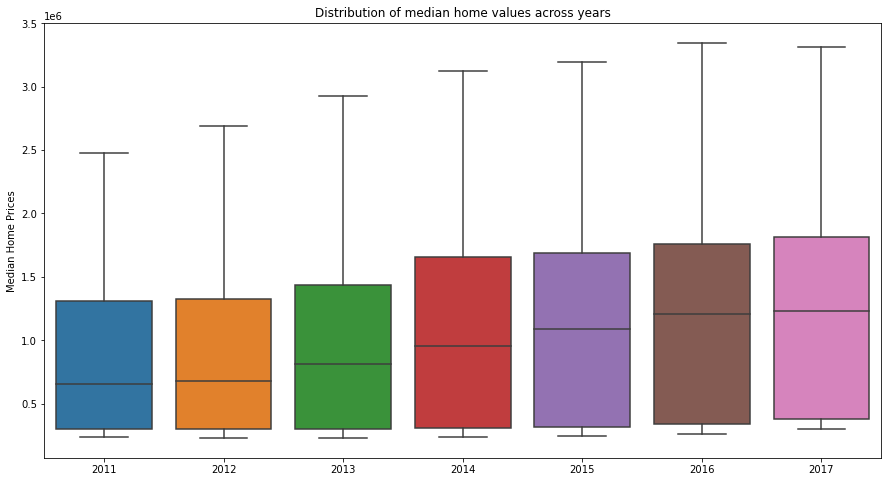

In [202]:

plt.figure(figsize=(15,8))
_ = sns.boxplot(x = 'Year', y = 'Median_Price', data = zillow_nyc[zillow_nyc['Year'] >= '2011'])
_ = plt.xlabel("")
_ = plt.ylabel("Median Home Prices")
_ = plt.title("Distribution of median home values across years")

In [203]:
#Representing each year(starting 2011) with its corresponding median value
zillow_nyc_price = zillow_nyc.groupby(['zipcode', 'Year'])['Median_Price'].median().reset_index()
zillow_nyc_price = zillow_nyc_price.loc[zillow_nyc_price['Year'] >= '2011']


In [204]:
zillow_nyc_price = zillow_nyc_price.loc[zillow_nyc_price['Year'] == '2017'].drop('Year', axis = 1)

In [205]:
airbnb1 = airbnb.copy()

In [206]:
def prepare_airbnb(df):
    '''
    Function takes input as the dataframe to be prepared. Returns the prepared dataset and a list of columns that were
    removed during this process
    '''
    #Remove columns with more than 50% null values
    df_airbnb = df.dropna(thresh = 0.50 * len(df), axis = 1)
    
    #Filter and keep rows that correspond to 2 bedroom properties
    df_airbnb = df_airbnb[df_airbnb['bedrooms'] == 2]
    
    #Remove '$' and ',' from the price column values and store them as float type
    #For Private room type, calculate price as price*2
    df_airbnb['price'] = df_airbnb['price'].str.replace('$', '')
    df_airbnb['price'] = df_airbnb['price'].str.replace(',', '')
    df_airbnb['price'] = df_airbnb['price'].astype('float')
    
    for index, row in df_airbnb.iterrows():
        if row['room_type'] == 'Private room':
            row['price'] = row['price']*2
        else:
            row['price'] = row['price']  
    
    #Find and remove columns that will not be useful for determining the profitability of a zip code, i.e. metadata for
    #properties & hosts and columns that are used by Airbnb as internal identifiers
    columns_to_remove = []
    for column in airbnb.columns:
        if column.startswith(("host", "require")):
            columns_to_remove.append(column)
        elif column.endswith(("url", "nights")):
            columns_to_remove.append(column)
    df_airbnb = df_airbnb[df_airbnb.columns[~df_airbnb.columns.isin(columns_to_remove)]]
    
    return df_airbnb, columns_to_remove

In [207]:
#Calling the above function and storing the return values
airbnb1, columns_removed = prepare_airbnb(airbnb1)

In [208]:
cols_to_drop_manual = ['id', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered',
                      'notes', 'access', 'interaction', 'house_rules', 'is_location_exact', 'amenities', 'security_deposit',
                      'cleaning_fee', 'guests_included', 'extra_people', 'calendar_updated', 'calendar_last_scraped',
                      'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                       'review_scores_communication', 'requires license', 'license', 'jurisdiction_names',
                       'instant_bookable', 'cancellation_policy', 'calculated_host_listings_count']
airbnb1 = airbnb1[airbnb1.columns[~airbnb1.columns.isin(cols_to_drop_manual)]]

In [209]:
#Get a list of unique neighbourhoods in our dataset
list_of_neighbourhoods = list(airbnb1['neighbourhood_group_cleansed'].unique())
list_of_neighbourhoods

['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

In [210]:
#Iterate over all neighbourhoods to generate a dictionary with neighbourhood as key and respective zipcode modes as values
most_frequent_zipcodes = {}
for neighbour in list_of_neighbourhoods:
    value = airbnb1.loc[airbnb1['neighbourhood_group_cleansed'] == neighbour, 'zipcode'].mode()[0]
    most_frequent_zipcodes[neighbour] = value
most_frequent_zipcodes

{'Manhattan': '10009',
 'Brooklyn': '11211',
 'Queens': '11385',
 'Bronx': '10451',
 'Staten Island': '10301'}

In [211]:
#Map dictionary values to NaN values in zipcode column
airbnb1['zipcode'] = airbnb1['zipcode'].fillna(airbnb1['neighbourhood_group_cleansed'].map(most_frequent_zipcodes))

In [212]:
#Convert 'zipcode' column to int
airbnb1['zipcode'] = airbnb1['zipcode'].astype('int')

In [213]:
#Join zillow and airbnb datasets on the zipcode column
combined = pd.merge(left = airbnb1, right = zillow_nyc_price, left_on = 'zipcode', right_on = 'zipcode')
combined.head()

,neighborhood_overview,transit,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,...,last_review,review_scores_rating,review_scores_location,review_scores_value,is_business_travel_ready,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Median_Price
0,"We are in the heart of Park Slope, a truly bea...",We are a 5-7 minute walk to the Union Street R...,"Brooklyn, NY, United States",Brooklyn,Park Slope,Brooklyn,Brooklyn,NY,11215,New York,...,2017-09-24,100.0,10.0,10.0,f,1,0,0,0.16,1045400.0
1,NaN,NaN,"Brooklyn, NY, United States",Brooklyn,South Slope,Brooklyn,Brooklyn,NY,11215,New York,...,2018-12-30,95.0,10.0,10.0,f,2,0,0,0.24,1045400.0
2,Great for families and friends. Close to bouti...,"The F, G and R trains are only 5 minutes away ...","Brooklyn, NY, United States",Gowanus,Gowanus,Brooklyn,Brooklyn,NY,11215,New York,...,2019-07-06,94.0,10.0,9.0,f,1,0,0,2.17,1045400.0
3,Quiet tree-lined street Two shopping/restauran...,On street parking. Also parking garage 4 block...,"Brooklyn, NY, United States",Park Slope,Windsor Terrace,Brooklyn,Brooklyn,NY,11215,New York,...,2019-05-17,97.0,10.0,10.0,f,0,1,0,0.26,1045400.0
4,Park Slope is considered one of New York City'...,"The F, G and R train are a 5-minute walk takin...","Brooklyn, NY, United States",Park Slope,South Slope,Brooklyn,Brooklyn,NY,11215,New York,...,2019-06-28,97.0,10.0,10.0,f,2,1,0,3.97,1045400.0


In [214]:
#Convert zipcode column to category type to make plotting easier
combined['zipcode'] = combined['zipcode'].astype('category')

We will need to normalize the review_scores_location column by the number of reviews each zipcode has received since there is some imbalance in the number of reviews received by each zipcode

In [215]:
#Calculate the sum of review scores received by each zipcode
review_score_plot = combined.groupby('zipcode')['review_scores_location'].sum().reset_index()

#Calculate the number of review scores received by each zipcode
review_score_plot_count = combined.groupby('zipcode')['review_scores_location'].count().reset_index()

#Combine the above dataframes
review_score_plot = pd.merge(left = review_score_plot, right = review_score_plot_count, left_on = 'zipcode', right_on = 'zipcode')

#Rename the columns
review_score_plot.columns = ['zipcode', 'review_scores_sum', 'review_scores_count']

#Calculate normalized scores
review_score_plot['normalized_review_scores'] = review_score_plot['review_scores_sum']/review_score_plot['review_scores_count']

In [216]:
review_score_plot.dtypes

zipcode                     category
review_scores_sum            float64
review_scores_count            int64
normalized_review_scores     float64
dtype: object

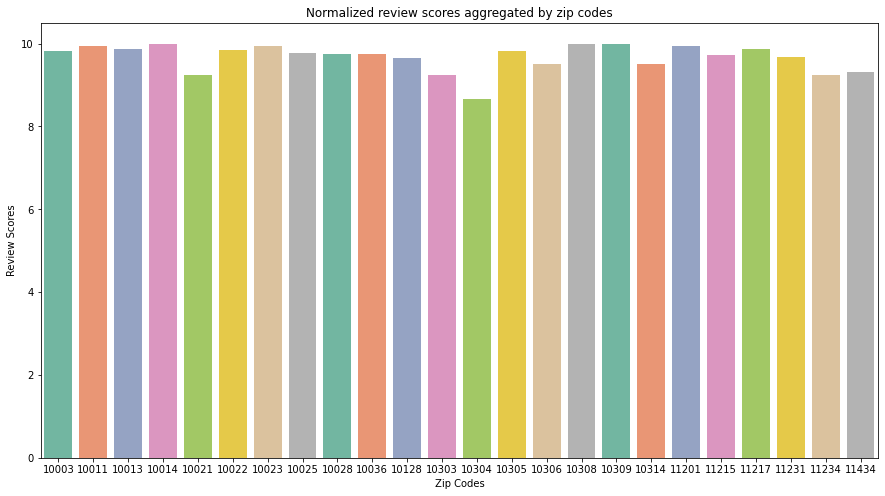

In [217]:
#Plot normalized review scores against each zipcode
plt.figure(figsize=(15,8))
_ = sns.barplot(x = 'zipcode', y = 'normalized_review_scores', data = review_score_plot, palette = 'Set2')
_ = plt.xlabel("Zip Codes")
_ = plt.ylabel("Review Scores")
_ = plt.title("Normalized review scores aggregated by zip codes")

## Demand for properties across zipcodes

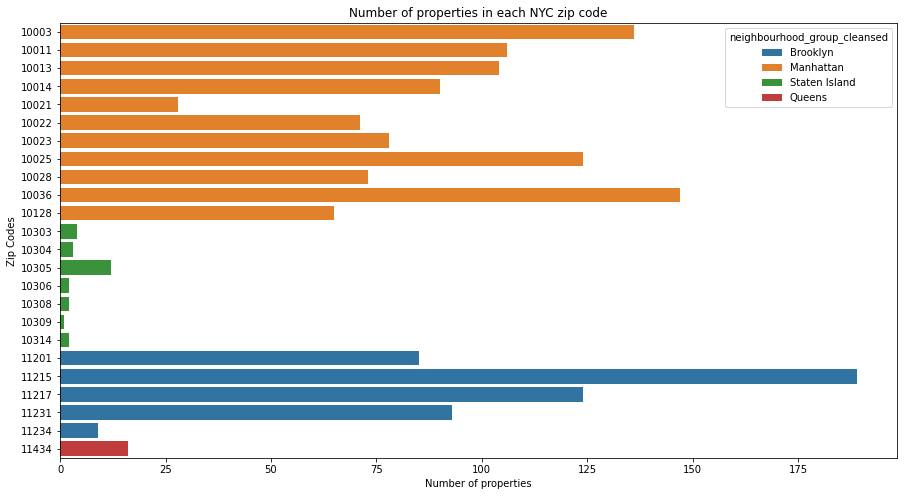

In [218]:
plt.figure(figsize=(15,8))
_ = sns.countplot(y = 'zipcode', hue = 'neighbourhood_group_cleansed', data = combined, dodge = False)
_ = plt.xlabel("Number of properties")
_ = plt.ylabel("Zip Codes")
_ = plt.title("Number of properties in each NYC zip code")

From the above plot we can say that zipcodes in Manhattan and Brooklyn have a considerably higher number of properties compared to Queens and Staten Island.More properties in Manhattan and Brooklyn areas imply more demand. More properties mean costomer have more options to choose from in a particular

In [219]:
combined.columns

Index(['neighborhood_overview', 'transit', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_location', 'review_scores_value',
       'is_business_travel_ready',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'Median_Price'],
      dtype='object')

In [220]:
combined['number_of_reviews'] = combined['number_of_reviews'].astype('float64')

In [221]:
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

In [222]:
zillow_nyc_2010 = zillow_nyc[zillow_nyc['Year'] > '2009']

In [223]:
zillow_nyc_2010.sort_values(by=['zipcode','Year','Month'])

,zipcode,Year,Month,Median_Price
4129,10003,2010,01,1227800.0
4154,10003,2010,02,1202600.0
4179,10003,2010,03,1207100.0
4204,10003,2010,04,1220100.0
4229,10003,2010,05,1252400.0
4254,10003,2010,06,1285700.0
4279,10003,2010,07,1278300.0
4304,10003,2010,08,1279100.0
4329,10003,2010,09,1326700.0
4354,10003,2010,10,1376500.0


In [224]:
zillow_nyc_2010.loc[:,'Day'] = '01'

In [225]:
zillow_nyc_2010['dateInt']=zillow_nyc_2010['Year'].astype(str) + zillow_nyc_2010['Month'].astype(str).str.zfill(2)+ zillow_nyc_2010['Day'].astype(str).str.zfill(2)
zillow_nyc_2010['Date'] = pd.to_datetime(zillow_nyc_2010['dateInt'], format='%Y%m%d')

In [226]:
zillow_nyc_2010

,zipcode,Year,Month,Median_Price,Day,dateInt,Date
4125,10025,2010,01,813300.0,01,20100101,2010-01-01
4126,10023,2010,01,1271900.0,01,20100101,2010-01-01
4127,10128,2010,01,985400.0,01,20100101,2010-01-01
4128,10011,2010,01,1378600.0,01,20100101,2010-01-01
4129,10003,2010,01,1227800.0,01,20100101,2010-01-01
4130,11201,2010,01,742800.0,01,20100101,2010-01-01
4131,11234,2010,01,378700.0,01,20100101,2010-01-01
4132,10314,2010,01,288700.0,01,20100101,2010-01-01
4133,11215,2010,01,529300.0,01,20100101,2010-01-01
4134,10028,2010,01,1126000.0,01,20100101,2010-01-01


In [227]:
#For 10003
zillow_nyc_2010_10003 = zillow_nyc_2010[zillow_nyc_2010['zipcode'] == 10003]
zillow_nyc_2010_10003 = zillow_nyc_2010_10003.drop(['zipcode','Year','Month','Day','dateInt'],axis=1)

In [228]:
zillow_10003 = zillow_nyc_2010_10003.set_index('Date')
ts = zillow_10003['Median_Price']
ts.head()

Date
2010-01-01    1227800.0
2010-02-01    1202600.0
2010-03-01    1207100.0
2010-04-01    1220100.0
2010-05-01    1252400.0
Name: Median_Price, dtype: float64

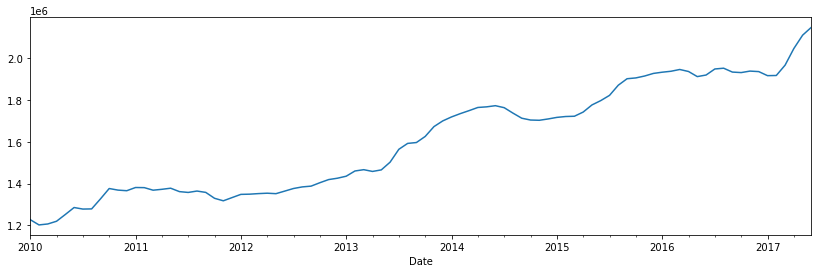

In [229]:
plt.figure(figsize=(14,4))
ts.plot()

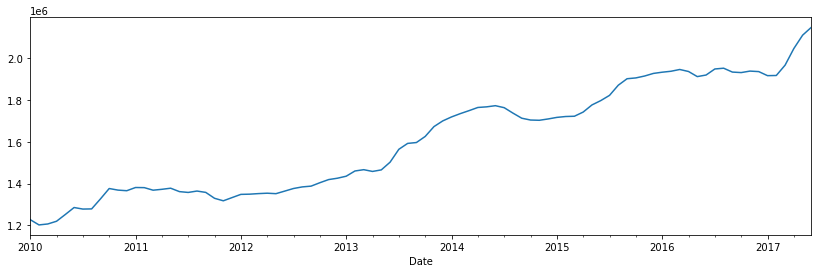

In [230]:
# Resample data by monthly
plt.figure(figsize=(14,4))
ts = ts.resample('M').mean()
ts.plot()

### Check Stationarity
* Plotting rolling statistics: we can plot moving average and moving variance
* Dickey Fuller test: It is statistical test to check stationarity,
* Null Hypothesis H0: Time series is non stationary
* Altenate Hypothesis H1: If test statics < critical value reject H0


Perfom Dickey fuller test
Test Statistic                  0.681683
p-value                         0.989465
#Lags Used                      4.000000
Number of Observations Used    85.000000
Critical Value (1%)            -3.509736
Critical Value (5%)            -2.896195
Critical Value (10%)           -2.585258
dtype: float64


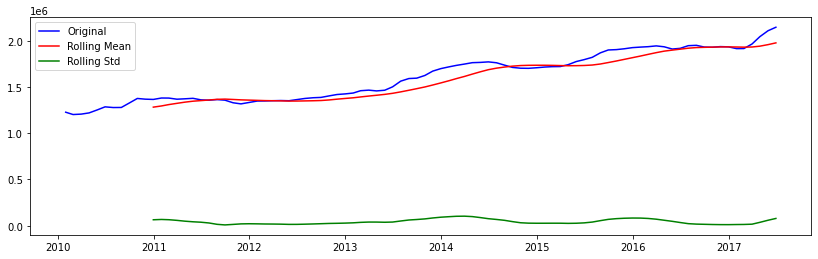

In [231]:
def test_stationarity(timeseries):
    
    #rolling statics
    rol_mean = timeseries.rolling(window = 12).mean()
    rol_std = timeseries.rolling(window = 12).std()
    
    #plot rolling statistics
    plt.figure(figsize=(14,4))
    plt.plot(ts, color = 'b', label = 'Original')
    plt.plot(rol_mean, color = 'r', label = 'Rolling Mean')
    plt.plot(rol_std, color = 'g', label = 'Rolling Std')
    plt.legend(loc='best')
    
    # Dickey fuller test
    print('Perfom Dickey fuller test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(ts)

The rolling mean is increasing continualy, so time series is non stationary In time series test statistics > critacal value of %5, so time series is non stationary.

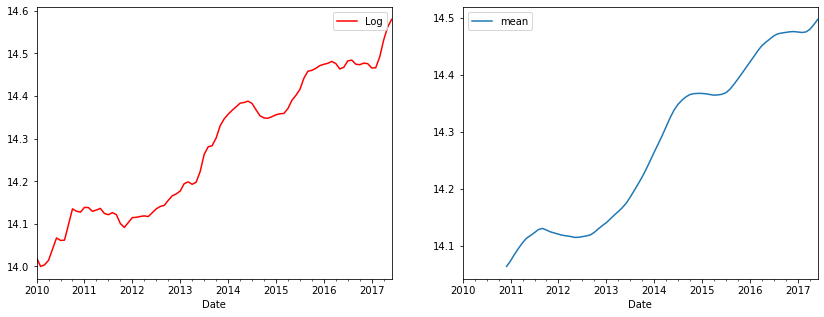

In [232]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
ax1, ax2 = ax.flatten()

ts_log = np.log(ts)
ts_log.plot(ax=ax1, label = 'Log',color = 'r')
ax1.legend(loc = 'best')

ts_ma = ts_log.rolling(12).mean()
ts_ma.plot(ax = ax2, label = 'mean')
ax2.legend(loc = 'best')

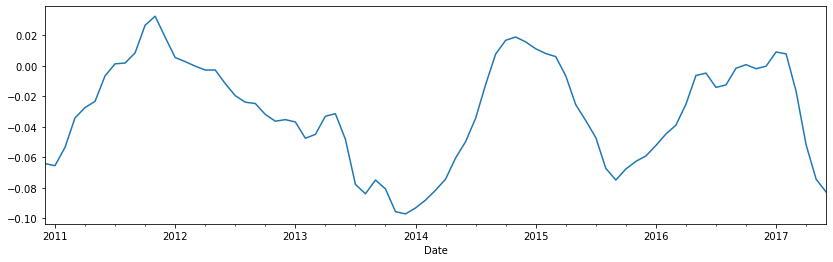

In [233]:
plt.figure(figsize=(14,4))
ts_dif = ts_ma - ts_log
ts_dif = ts_dif.dropna() # fill na
ts_dif.plot()

Eliminating Trend and seasonality
* Differencing: taking difference with perticualar time lag
* Decomposing: Modelling both trend and seasonality and removing them from the model

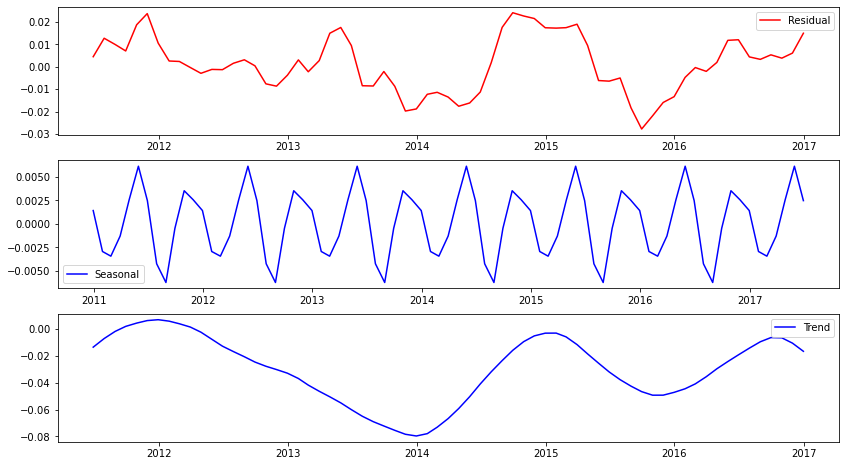

In [234]:
# Decomposing
docom = seasonal_decompose(ts_dif)
fig,ax = plt.subplots(3,1,figsize=(14,8))
ax
ax[0].plot(docom.resid,label = 'Residual', color = 'r')
ax[0].legend(loc= 'best')
ax[1].plot(docom.seasonal, label = 'Seasonal', color = 'b')
ax[1].legend(loc = 'best')
ax[2].plot(docom.trend,  label = 'Trend', color = 'b')
ax[2].legend(loc = 'best')

Perfom Dickey fuller test
Test Statistic                 -3.661134
p-value                         0.004694
#Lags Used                      3.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


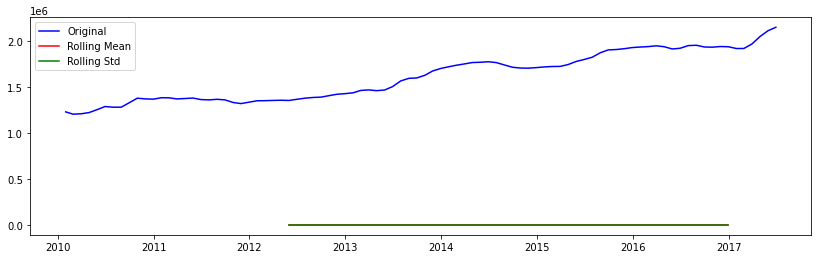

In [235]:
test_stationarity(docom.resid.dropna())

test statistics < critical value & p-value is 0.002 we are getting constant mean and standard deviation.

Forcasting time series using ARIMA
The ARIMA forcasting for stationary time series is nothing but linear equation(like linear regression). The predictor depend on (p, d, q) of Arima model.

Time series linear equation: x(t) = alphax(t-1)error(t)

* ARIMA: Auto Regressor Integrated Moving Average
> Number of AR (Auto regressor) term (p): AR term is lag of dependent variable. If p is 3 then predictor for x(t) will be x(t-1)..x(t-3)
Number of MA (Moving Average) term (q): MA term is lag of forcast error of predictor equation. If q is 3 then error for x(t) will be e(t-1)..e(t-3)
Number of Differences (d): The number of times that the raw observations are differenced, also called the degree of differencing.
To determine p and q we will use two plots
* Auto Correlation Function ACF: It is a measure of correlation between TS and lagged of TS (q)
> Partial Auto Correlation Function PACF: This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons.(p)

In [236]:
# ACF
lag_acf = acf(ts_dif,nlags=20)
#PACF
lag_pacf = pacf(ts_dif, nlags=20, method='ols')

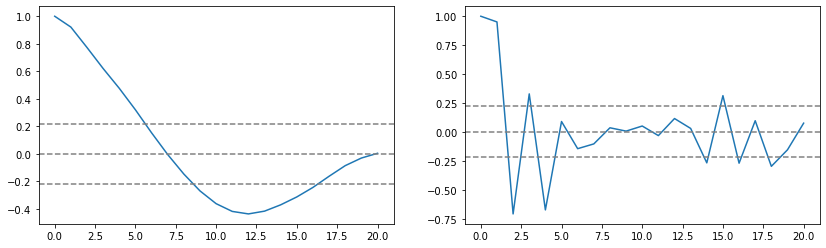

In [237]:
fig,ax = plt.subplots(1,2, figsize=(14,4))
ax1, ax2 = ax.flatten()
ax1.plot(lag_acf)
ax1.axhline(y=0,linestyle='--',color= 'gray')
ax1.axhline(y= - 1.96/np.sqrt(len(ts_dif)), linestyle='--',color= 'gray')
ax1.axhline(y=  1.96/np.sqrt(len(ts_dif)), linestyle='--',color= 'gray')

ax2.plot(lag_pacf,)
ax2.axhline(y=0,linestyle = '--', color = 'gray')
ax2.axhline(y = -1.96/np.sqrt(len(ts_dif)), linestyle = '--', color = 'gray')
ax2.axhline(y = 1.96/np.sqrt(len(ts_dif)), linestyle = '--', color = 'gray')

* The dotted lines in confidence interval, this can be used to determine p and q.

> p: The lag value where the PACF chart crosses upper chart for first time.

> q: The lag value where ACF chart crosses upper chart for first time. Here p = 5, q = 1, order = (5,1,1)

                             ARIMA Model Results                              
Dep. Variable:         D.Median_Price   No. Observations:                   78
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 287.773
Method:                       css-mle   S.D. of innovations              0.006
Date:                Thu, 19 Nov 2020   AIC                           -559.547
Time:                        06:56:23   BIC                           -540.693
Sample:                    01-31-2011   HQIC                          -551.999
                         - 06-30-2017                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0003      0.000     -0.791      0.429      -0.001       0.000
ar.L1.D.Median_Price     2.0847      0.114     18.322      0.000       1.862       2.308
ar.L2.D.Medi

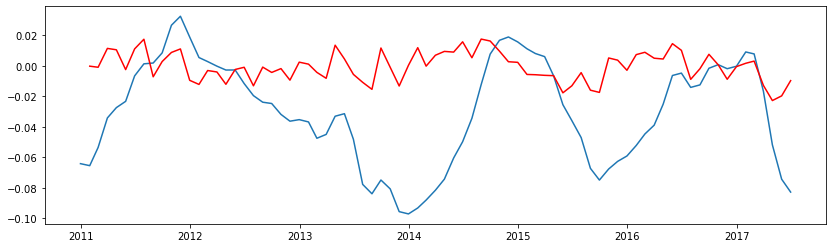

In [238]:
model = ARIMA(ts_dif, order = (5,1,1))
model_fit = model.fit(disp=5)
print(model_fit.summary())
plt.figure(figsize=(14,4))
plt.plot(ts_dif)
plt.plot(model_fit.fittedvalues,color = 'r')

In [239]:
df_zip_price_only

,zipcode,price
0,10001,313.0
1,10002,246.0
2,10003,250.0
3,10004,300.0
4,10005,392.0
5,10006,412.0
6,10007,373.0
7,10009,250.0
8,10010,299.5
9,10011,322.5


In [240]:
#df_zip_price_both1= pd.merge(df_zip_price_only, combined_median, on='zipcode', how='inner')
df_zip_price_both1 =df_zip_price_both1.drop_duplicates()
df_zip_price_both1

,zipcode,price,Median_Price,ratio
0,10003,0.665414,0.584011,1.139385
136,10011,0.937970,0.704126,1.332106
242,10013,1.000000,1.000000,1.000000
347,10014,0.842105,0.746260,1.128433
437,10021,0.505639,0.482147,1.048725
465,10022,0.853383,0.535121,1.594749
536,10023,0.703008,0.578221,1.215811
614,10025,0.571429,0.355639,1.606767
738,10028,0.661654,0.542600,1.219414
811,10036,0.883459,0.488764,1.807536


In [241]:
#Scaling features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#df_zip_price_both1 = pd.df_zip_price_both1({'A':[14.00,90.20,90.95,96.27,91.21],
 #                          'B':[103.02,107.26,110.35,114.23,114.68],
  #                         'C':['big','small','big','small','small']})

df_zip_price_both1[["price", "Median_Price"]] = scaler.fit_transform(df_zip_price_both1[["price", "Median_Price"]])
df_zip_price_both1

,zipcode,price,Median_Price,ratio
0,10003,0.665414,0.584011,1.139385
136,10011,0.937970,0.704126,1.332106
242,10013,1.000000,1.000000,1.000000
347,10014,0.842105,0.746260,1.128433
437,10021,0.505639,0.482147,1.048725
465,10022,0.853383,0.535121,1.594749
536,10023,0.703008,0.578221,1.215811
614,10025,0.571429,0.355639,1.606767
738,10028,0.661654,0.542600,1.219414
811,10036,0.883459,0.488764,1.807536


In [242]:
df_zip_price_both1["ratio"] = df_zip_price_both1['price']/df_zip_price_both1['Median_Price']

In [243]:
df_zip_price_both1

,zipcode,price,Median_Price,ratio
0,10003,0.665414,0.584011,1.139385
136,10011,0.937970,0.704126,1.332106
242,10013,1.000000,1.000000,1.000000
347,10014,0.842105,0.746260,1.128433
437,10021,0.505639,0.482147,1.048725
465,10022,0.853383,0.535121,1.594749
536,10023,0.703008,0.578221,1.215811
614,10025,0.571429,0.355639,1.606767
738,10028,0.661654,0.542600,1.219414
811,10036,0.883459,0.488764,1.807536


The ratios of rent and Price of property shows that in less investment if we get more profits on rent then ratio values>1 are profitable. Therefore, 10305, 10306, 10308, 11234 ,11434 seem to be a good fit for investment for 2 bedroom apartments. 10303 is an anomaly.

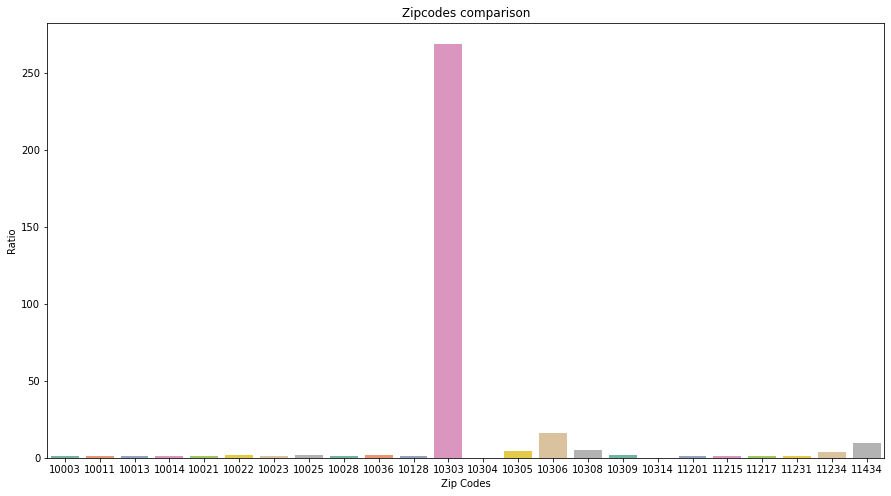

In [252]:
#Plot  ratio to zipcodes
plt.figure(figsize=(15,8))
_ = sns.barplot(x = 'zipcode', y = 'ratio', data = df_zip_price_both1, palette = 'Set2')
_ = plt.xlabel("Zip Codes")
_ = plt.ylabel("Ratio")
_ = plt.title("Zipcodes comparison")